# Simulated Annealing


## Introduction and Context

**Simulated Annealing (SA)** is a global optimization metaheuristic first proposed by **Kirkpatrick, Gelatt & Vecchi in 1983**. It is inspired by the  **thermodynamic process of metal annealing**. In metallurgy, annealing involves heating a material to high temperatures and then gradually cooling it to reduce defects in its crystalline structure, ultimately reaching a minimum-energy state. Analogously, SA searches for optimal solutions in complex problems by allowing stochastic "moves" that can temporarily accept worse solutions, thus avoiding premature convergence to local minima.

### Physical Mechanism vs. Algorithm

* **Initial Heating**:
  In physical annealing, high temperatures allow atoms to move freely and reorganize.
  In SA, a **high initial temperature** $(T_0)$ enables the acceptance of higher-cost solutions $(\Delta f > 0)$, promoting exploration of distant regions in the search space.

* **Controlled Cooling**:
  In physical annealing, slow cooling $(T \to 0)$ allows atoms to stabilize into low-energy configurations.
  In SA, as $T$ decreases, the algorithm becomes more selective, favoring better solutions $(\Delta f \leq 0)$ and refining the search.


**Table 1** maps thermodynamic concepts to optimization:  

| Thermodynamics         | Optimization               |  
|------------------------|---------------------------|  
| System States          | Feasible Solutions        |  
| Energy                 | Cost $f(x)$               |  
| State Change           | Neighborhood Structure    |  
| Temperature (\(T\))    | Exploration Control       |  
| Frozen State           | Heuristic Solution        |  

**Source:** Dowsland (1995).

## Theoretical Foundations

### Boltzmann Distribution and Acceptance Criterion  

The basic idea of the SA algorithm is to use random search in terms of a Markov chain, which <u>not only accepts changes that improve the objective function but also keeps some changes that are not ideal</u>. 

SA’s theoretical basis lies in the **Boltzmann distribution** from statistical mechanics, which describes the probability of a thermodynamic system occupying a state with energy $E$ at temperature $T$:

$$
P(E) \propto e^{E / (k_B T)},
$$

where $k_B$ is the Boltzmann constant. This probability is also called **transition probability**.

In SA, this distribution is adapted to define the **acceptance probability** of worse solutions. Considerind $\Delta f = f(x_{\text{new}}) - f(x_{\text{current}})$, the probability $p(\Delta f, T)$ is defined as 

$$
p(\Delta f, T) = \begin{cases}
      1  & \Delta f \leq 0 \\
      e^{-\Delta f / T} & \Delta f \gt 0
\end{cases}
$$

* **Interpretation**:

  * If $\Delta f \leq 0$ (better solution), then $p = 1$: the new solution is always accepted.
  * If $\Delta f > 0$ (worse solution), $p$ decays exponentially with $T$.
  * A higher temperature $T$ increases the probability of accepting worse solutions, promoting **exploration** in the early stages of the search.

## Algorithm

**Simulated Annealing**

$
\text{1. Initialize temperature } T_0 \text{ and initial guess } x_0 \\
\text{2. Set the optimal solution as the initial solution } x^* = x_0 \text{ and } f^* = f(x_0) \\
\text{3. Set the final temperature } T_f \text{ and the max number of iterations per temperature} N \\
\text{4. Define the cooling schedule } \tau (.) \\
\text{5. While } (T \gt T_f)\text{:} \\
    \text{6.} \; \; \; \; \; \; \text{for } t= \{1, 2, \ldots, N\} \\
    \text{7.} \; \; \; \; \; \; \; \; \; \; \; \; \text{Draw } \epsilon \text{ from a Gaussian distribution } \\
    \text{8.} \; \; \; \; \; \; \; \; \; \; \; \; \text{Move to a new candidate solution: } y = x_t + \epsilon \text{ (random walk)} \\
    \text{9.} \; \; \; \; \; \; \; \; \; \; \; \; \text{Calculate } \Delta f = f(y) - f(x_t) \\
    \text{10.} \; \; \; \; \; \; \; \; \; \;   \text{Calculate } P_{t} = e^{- \Delta f / T} \\
    \text{11.} \; \; \; \; \; \; \; \; \; \;   \text{Generate a random number } r \in [0,1] \\
    \text{12.} \; \; \; \; \; \; \; \; \; \; \; x_{t+1} =
      \begin{cases}
      y  & \text{if } \Delta f \lt 0 \\
      y & \text{if } \Delta f \geq 0 \; \& \; P_t \gt r \\
      x_{t} & \text{if } \Delta f \geq 0 \; \& \; P_t \leq r
      \end{cases} \\ 
    \text{13.} \; \; \; \; \; \; \; \; \; \; \; \text{If } f(x_{t+1}) \lt f^* \text{:} \\
    \text{14.} \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \text{Set the optimal solution } x^* = x_0 \text{ and } f^* = f(x_0) \\
    \text{15.} \; \; \; \; \; \; \text{Update } T = \tau (T) \\
$

### Choosing $T_0$ and $T_f$


* The choice of the right **$T_0$** is very important 
  * When $T$ is too high, then ($P_t \rightarrow 1$) and the exploitation is limited (almost all the changes will be accepted). 
  * If $T$ is too low, then ($P_t \rightarrow 0$) and the exploration is limited (the system may be trapped in a local minimum). 
  * So **$T_0$** must be chosen in way that the <u>system cools down gradually from a higher temperature</u> to ultimately <u>freeze to a global minimum</u>
  * If we know the maximum change of the objective function ($\max(\Delta f)$), and considering that $p_0$ is the initial probability of accepting worse solutions (e.g., $p_0 = 0.8$), $T_0$ is estimated as

$$
T_0 \approx \frac{-\max(\Delta f)}{\ln p_0}
$$

* The final temperature should be zero in theory so that no worse move can be accepted
  * In practice, we choose a very small valye $T_f = 10^{-10} \sim 10^{-5}$



### Choosing the Cooling Schedules





* **Geometric** (most common):

$$
T_{k+1} = \alpha T_k, \quad \alpha \in [0.7, 0.99]
$$

* **Linear**:

$$
T_t = T_0 - \beta t, \quad \beta = \frac{T_0 - T_f}{N}
$$

* **Logarithmic** (guaranteed convergence):

$$
\mathcal{T}(t) = \frac{h}{\log t}, \quad h > 0
$$



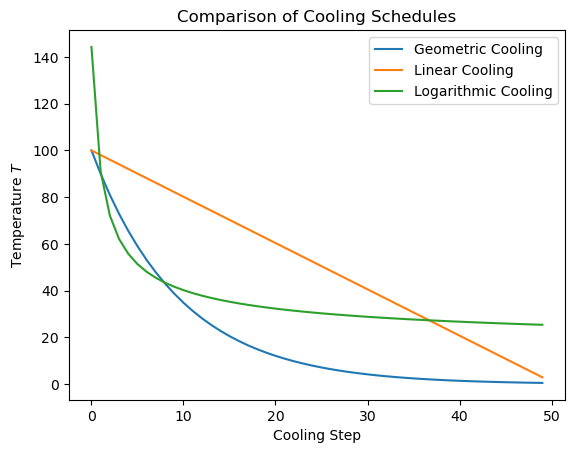

### Choosing $N$



* **Critical Balance**:

  * Too many evaluations per temperature $\rightarrow$ slow convergence.
  * Too few evaluations $\rightarrow$ risk of instability.

* **Strategies**:

  * Fixed: Constant iterations per temperature.
  * Variable: Increase iterations at lower $T$ for better exploitation.


## SA - Example

In [ ]:
!pip install pyMetaheuristic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 9.9 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pyMetaheuristic]━━ 2/3 [pyMetaheuristic]


### Required Libraries


In [9]:
import numpy as np
import matplotlib.pyplot as plt

### Target Function: Easom Function


A Easom function is a multimodal function whose global minimum is $f(\pi, \pi) = -1$.


In [10]:
def easom(variables_values=[0, 0]):
    x1, x2 = variables_values
    return -np.cos(x1) * np.cos(x2) * np.exp(-(x1 - np.pi)**2 - (x2 - np.pi)**2)

### Approach 1: Implementing from Scratch


Manual SA Parameters

In [11]:
li, ls      = -5.0, 5.0       # search bounds
T0, Tf      = 1.0, 1e-4       # initial and final temperatures
alpha       = 0.9             # geometric cooling factor
inner_iters = 100             # iterations per temperature


Manual SA Implementation


In [12]:
def sa_manual(target, li, ls, T0, Tf, alpha, inner_iters):
    x = np.random.uniform(li, ls, 2)   # initial random solution
    fx = target(x)
    best_x, best_fx = x.copy(), fx
    history = [fx]
    history_best = [best_fx]
    T = T0

    while T > Tf:
        for _ in range(inner_iters):
            x_new = x + np.random.normal(0, 1, 2)
            x_new = np.clip(x_new, li, ls)
            fx_new = target(x_new)
            # Metropolis criterion
            if fx_new < fx or np.random.rand() < np.exp(-(fx_new - fx)/T):
                x, fx = x_new, fx_new
                if fx < best_fx:
                    best_x, best_fx = x.copy(), fx
            history.append(fx)
            history_best.append(-best_fx)
        T *= alpha

    return history, best_x, best_fx, history_best

Run Manual SA

In [13]:
hist_m, x_m, f_m, best_m = sa_manual(easom, li, ls, T0, Tf, alpha, inner_iters)
print("Manual SA → x* =", np.round(x_m,4), " f* =", round(f_m,4))


Manual SA → x* = [3.1218 3.1509]  f* = -0.9993


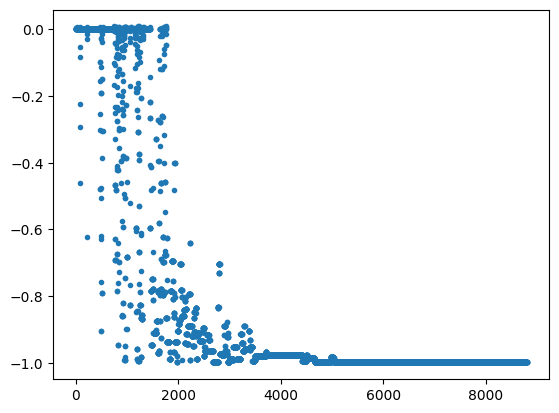

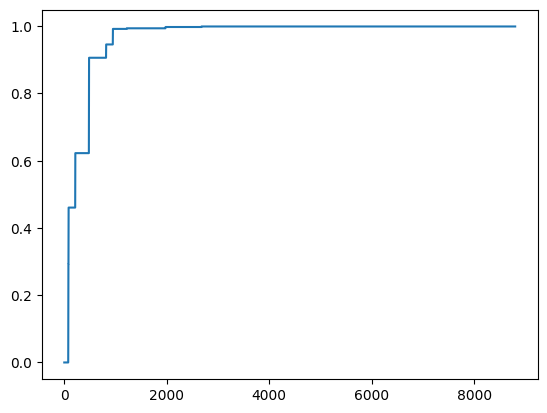

In [14]:
plt.plot(hist_m,'.')
plt.show()
plt.plot(best_m,)
plt.show()

### Approach 2: pyMetaheuristic Library

Library Imports

Available at: [https://github.com/Valdecy/pyMetaheuristic](https://github.com/Valdecy/pyMetaheuristic)

In [15]:
from pyMetaheuristic.algorithm import simulated_annealing

Library SA Parameters

* **`min_values`/`max_values`**: Define the search domain per dimension.
* **`alpha`**: Closer to 1 → slower cooling (more exploration).
* **`mu`, `sigma`**: Gaussian step size; you can tune exploration radius.
* **`temperature_iterations`**: Number of proposals at each $T$.
* **`initial_temperature`/`final_temperature`**: Control the overall runtime and convergence precision.
* **`verbose`**: If `True`, prints best fitness at each temperature.

In [18]:
parameters = {
    'min_values':            (li, li),
    'max_values':            (ls, ls),
    'alpha':                 alpha,
    'mu':                    0,
    'sigma':                 1,
    'temperature_iterations':inner_iters,
    'initial_temperature':   T0,
    'final_temperature':     Tf,
    'verbose':               False,
    'start_init':            None,
    'target_value':          None
}


Run Library SA

In [19]:
sa = simulated_annealing(target_function=easom, **parameters)
vars_lib = sa[:-1]
f_lib    = sa[-1]
print("Library SA → x* =", np.round(vars_lib,4), " f* =", round(f_lib,4))


Library SA → x* = [3.1578 3.1334]  f* = -0.9995


# Genetic Algorithms

## Basic Idea


A Genetic Algorithm (GA) is an evolutionary metaheuristic inspired by the process of natural selection, in which the fittest individuals survive and produce offspring similar to themselves, while the less fit are gradually eliminated over time.

John Holland proposed GAs in 1975, establishing that a **population** of candidate solutions to a problem is randomly generated. The **fittest individuals** (solutions), according to an objective function (*fitness function*), have a higher chance of producing offspring similar to themselves through the process of **crossover**.

In a binary problem, for example, each decision variable can be represented as a gene of an individual (also called a chromosome), as shown in the figure below.


<img src="./figures/ga-population.png" alt="drawing" width="700"/>

Source: [https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python](https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python)


The **fitness function** indicates the quality of a chromosome. This function takes into account the objective function of the optimization problem but may also consider other aspects, especially in cases involving constraints.


## GA Structure


<img src="./figures/ga-structure.webp" alt="drawing" width="1000"/>

Source: [https://towardsdatascience.com/an-introduction-to-genetic-algorithms-the-concept-of-biological-evolution-in-optimization-fc96e78fa6db](https://towardsdatascience.com/an-introduction-to-genetic-algorithms-the-concept-of-biological-evolution-in-optimization-fc96e78fa6db)

This is a general structure, but several aspects of each of these steps must be defined.


### What Needs to Be Defined?


* **Solution representation**: can be a binary string, a vector of integers, a vector of floating-point numbers, or a permutation of a list. Example: the solution to the traveling salesman problem is encoded as a list of vertices; the figure below shows a vector of real numbers.
* **Population initialization**: randomly defined. Example: the image below shows 5 chromosomes whose alleles were drawn from a continuous uniform distribution in the interval $[-5, 5]$.
* **Fitness evaluation**: each chromosome in the population is passed to the fitness function for evaluation. Example: the figure below shows the fitness calculation for the problem $\min z = x_1^2 + x_2^2$.


<img src="./figures/ga-fitcalc.png" alt="drawing" width="600"/>

Source: [https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python](https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python)

* **Mating**: In each iteration, the GA generates new solutions from the existing ones.

  * It starts with the **selection** of the fittest chromosomes to become parents. Several methods exist, with the most well-known being:

    * **Elitism**: the best individuals are selected directly.
    * **Random**: a subset is drawn with equal probability.
    * **Proportionate** (roulette wheel): individuals are randomly selected with probability proportional to their fitness.
    * **Tournament**: *n* tournaments are held (*n* being the number of offspring to be generated), each involving *k* randomly selected chromosomes. The best among them (according to the fitness function or another criterion) is chosen. A common setting is *k = 2*, known as **binary tournament**.

  * Then, the **crossover** operator is applied, using the selected parents to generate offspring, mimicking biological reproduction. Several methods are available, with the three most common being:

    * **One-point crossover**: a single crossover point is randomly selected (dividing the genes into two contiguous segments), and two offspring are produced such that each inherits one segment from each parent.
    * **Multi-point crossover**: generalizes the idea of genetic material exchange by using multiple crossover points.
    * **Uniform crossover**: each gene is taken from parent 1 with probability $p$, or from parent 2 with probability $1 - p$.


**One-Point Crossover**

<img src="./figures/ga-SinglePointCrossover.png" alt="drawing" width="800"/>

Source: [https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python](https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python)

**Multi-Point Crossover**

<img src="./figures/ga-TwoPointCrossover.png" alt="drawing" width="800"/>

Source: [https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python](https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python)

**Uniform Crossover**

<img src="./figures/ga-UniformCrossover.png" alt="drawing" width="800"/>

Source: [https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python](https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python)

* **Mutation**: Mimicking biological mutation, each offspring undergoes a random modification, introducing new characteristics into the solutions. This enhances the exploration of the search space. Several mutation methods exist, with the three most common being:

  * **Bit flip**: used with binary variables, a single gene in the chromosome is flipped.
  * **Swap**: used with permutation-based representations, the values of two genes are swapped.
  * **Random reset**: used with continuous or integer-valued vectors, a gene’s value is replaced based on a probability distribution.

* **Survivor Selection**: From among the parents and offspring, a subset of chromosomes is selected to form the population for the next generation. Typically, selection is based on fitness, with the best individuals being retained. If the optimization problem includes constraints, feasibility can also be used as a survival criterion.

  * **Merging parents and offspring**: individuals not selected for crossover may be discarded.

* **Stopping Criteria**: Several methods exist and can be combined. The three most commonly used are:

  * A predefined number of iterations (generations);
  * A predefined fitness value is reached;
  * No significant improvement in results after a certain number of iterations.



## GA Parameters


Some parameters have a strong influence on the behavior and performance of a GA, both in terms of solution quality and execution time.

* **Population Size**: a small population may lead to lower solution quality since it covers fewer points in the search space. A larger population increases coverage and helps avoid premature convergence (i.e., getting stuck in local optima), but it requires more time and computational resources.

* **Crossover Rate**: after the selection step, offspring may be generated without performing crossover, meaning they are exact copies of their parents. The crossover rate defines the probability that a pair of parents will undergo crossover to produce offspring. <u>If high</u>, new structures are introduced into the population more quickly, but good individuals may be lost.
  If low, most new structures will be introduced through mutation, which can slow down convergence.

* **Mutation Rate**: defines the probability that an offspring chromosome will be selected for mutation.
  If the rate is too high, the search becomes almost random.
  If it is too low, convergence may become very slow.


## GA – Example 1

Build a Genetic Algorithm to find a solution to the following problem:

$$
\min z = x_1^2 + x_2^2
$$


This is a nonlinear unconstrained problem. The objective function forms the paraboloid shown below, with its minimum located at $(x_1, x_2) = (0, 0)$, where $z = 0$. We will build a Genetic Algorithm (GA) and verify whether it converges to the optimal solution.

We will explore two approaches to implementing the GA:

1. **Building the algorithm from scratch**, or
2. **Using the `pyMetaheuristic` library**.
3. **Using the `pymoo` library**.


### Implementing from Scratch


We have two decision variables, so each chromosome will have 2 genes. We choose a population of 10 chromosomes, each represented as a vector of real numbers.

Each gene can take values between $-5$ and $5$. This interval is arbitrarily chosen and should be carefully selected for each specific case, as it defines the boundaries of the search space. If this space does not include the global optimum, the GA will not be able to find it.


In [20]:
genes = 2
cromossomos = 10
li = -5
ls = 5
dimensaoPop = (cromossomos, genes)
geracoes = 200
qtdeCromoCruzamento = 6
qtdeCromoProle = cromossomos - qtdeCromoCruzamento

txMutacao = 0.5
txCruzamento = 0.3

#### Population Initialization


In [21]:
import numpy as np

np.random.seed=1

def criaPop(li,ls,dimensao):
  pop = np.random.uniform(li, ls, dimensao)
  return pop

#### Fitness Function


In [23]:
def f(cromo):
  return np.sum(cromo*cromo) #calcula x1^2+x2^2

#### Crossover


We use the **k-best selection** method.


In [24]:
def cruzamento(pop,qtdePais,qtdeProle,txCruz):
  """
    [Entradas]
    pop: população atual
    qtdePais: o número de cromossomos usados como pais
    qtdeProle: o número de cromossomos a ser gerados como prole
    txCruz: chance de haver um cruzamento entre dois cromossomos

    [Saídas]
    pais: conjunto de cromossomos escolhidos como pais
    prole: conjunto de cromossomos escolhidos como prole
  """

  #calcula aptidão de cada cromossomo
  aptidao = f(pop)
  #ordena os cromossomos segundo a aptidao. menores são mais aptos
  popOrdenada = sorted(pop, key = f)
  pais = np.vstack(popOrdenada[:qtdePais])
  #vetor para armazenar a prole
  prole = np.empty((qtdeProle, pop.shape[1]))

  for k in range(qtdeProle):
    # Index of the first parent
    pai1Index = k%pais.shape[0]
    # Index of the second.
    pai2Index = (k+1)%pais.shape[0]
    #Alguns cruzam, outros repetem o melhor
    if np.random.random() > txCruz:
      #Determining the crossover point
      ponto = np.random.randint(0,pop.shape[1])
      # Extracting first half of the offspring
      prole[k, 0: ponto] = pais[pai1Index, 0: ponto]
      # Extracting second half of the offspring
      prole[k, ponto:] = pais[pai2Index, ponto:]
    else:
      prole[k,] = pais[pai1Index]
  return pais,prole

#### Mutation


We will use **random mutation**, since the alleles are continuous values. According to the mutation rate, a gene is selected and assigned a new value drawn from a uniform distribution between $-5$ and $5$.


In [25]:
def mutacao(cromos,txMut,li,ls):
  for cromo in cromos:
    if np.random.random() < txMut:
      idx = np.random.randint(0,len(cromo))
      valor = np.random.uniform(li, ls, 1)
      cromo[idx] = valor

#### Survival Selection


We will use the **merging of parents and offspring** method, discarding the worst individuals.


In [26]:
def sobrevivencia(pais,prole):
  return np.vstack([pais,prole])

#### GA


In [27]:
populacao = criaPop(li,ls,dimensaoPop)

for i in range(geracoes):
  pais,prole = cruzamento(populacao,qtdeCromoCruzamento,qtdeCromoProle,txCruzamento)
  mutacao(prole,txMutacao,li,ls)
  populacao = sobrevivencia(pais,prole)

populacaoOrdenada = sorted(populacao, key = f)
for cromo in populacaoOrdenada:
  print(cromo,f(cromo))

[0.03320358 0.04171984] 0.002843022938148341
[0.03320358 0.04171984] 0.002843022938148341
[0.03320358 0.04171984] 0.002843022938148341
[0.03320358 0.04171984] 0.002843022938148341
[0.03320358 0.04171984] 0.002843022938148341
[0.03320358 0.04171984] 0.002843022938148341
[0.03320358 0.04171984] 0.002843022938148341
[0.03320358 0.04171984] 0.002843022938148341
[0.03320358 0.04171984] 0.002843022938148341
[0.03320358 0.04171984] 0.002843022938148341


/tmp/ipykernel_78148/3348874731.py:6: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



### Using the **pyMetaheuristic** library



Install the library that provides a ready‐to‐use `genetic_algorithm` and plotting utilities.


In [ ]:
!pip install pyMetaheuristic

Required Libraries


In [22]:
import numpy as np
from pyMetaheuristic.algorithm import genetic_algorithm
from pyMetaheuristic.utils   import graphs


Target Function

We minimize

$
f(x_1, x_2) = x_1^2 + x_2^2,
$

whose global minimum is $(0,0)$ with $f=0$.

In [23]:
def paraboloid(variables):
    """
    Target Function: Paraboloid
    variables: list or array [x1, x2]
    returns: x1^2 + x2^2
    """
    x1, x2 = variables
    return x1**2 + x2**2


GA Parameters


In [28]:
li, ls        = -5.0, 5.0    # search bounds
cromossomos   = 100           # population size
geracoes      = 400          # number of generations
txMutacao     = 0.5          # mutation rate


Running the Genetic Algorithm


**Key Parameters**

* **`population_size`**: Larger → better coverage, slower runtime.
* **`elite`**: Preserves best individuals; too many → loss of diversity.
* **`eta`, `mu`**: Control intensity of crossover and mutation.
* **`mutation_rate`**: Chance each gene mutates.
* **`min_values`/`max_values`**: Defines gene bounds (can be real‐valued).

In [29]:
best = genetic_algorithm(
    population_size = cromossomos,      # population size
    mutation_rate   = txMutacao,        # mutation probability
    elite           = 1,                # number of elite individuals
    min_values      = (li, li),         # lower bounds
    max_values      = (ls, ls),         # upper bounds
    eta             = 1,                # crossover intensity
    mu              = 1,                # mutation intensity
    generations     = geracoes,         # number of generations
    target_function = paraboloid,       # fitness function
    verbose         = True,             # display fitness per generation
    start_init      = None,             # no fixed initial guess
    target_value    = None              # no target value
)

print("Running with the same parameters of the from scratch version")
print("Best solution: \nX = %s,%s\nF = %s" % (best[0], best[1], best[2]))

Generation =  0  f(x) =  0.6179462380421077
Generation =  1  f(x) =  0.11985095427658382
Generation =  2  f(x) =  0.07189916384248281
Generation =  3  f(x) =  0.003620587720357857
Generation =  4  f(x) =  0.003620587720357857
Generation =  5  f(x) =  0.0005949346596973963
Generation =  6  f(x) =  0.0005949346596973963
Generation =  7  f(x) =  0.0005949346596973963
Generation =  8  f(x) =  0.0005949346596973963
Generation =  9  f(x) =  0.0005949346596973963
Generation =  10  f(x) =  0.0005949346596973963
Generation =  11  f(x) =  0.0005949346596973963
Generation =  12  f(x) =  0.0005949346596973963
Generation =  13  f(x) =  0.00029415815184314606
Generation =  14  f(x) =  0.0002289080819415986
Generation =  15  f(x) =  0.0002289080819415986
Generation =  16  f(x) =  0.00022835046451491166
Generation =  17  f(x) =  0.00022835046451491166
Generation =  18  f(x) =  0.00022835046451491166
Generation =  19  f(x) =  0.00022835046451491166
Generation =  20  f(x) =  0.00022835046451491166
Gener

### Usando a biblioteca pymoo

Abaixo nós resolvemos o problema com a biblioteca ```pymoo```.

Começamos estabelecendo o problema na classe ```Exemplo``` que herda da classe ```Problem```. A biblioteca ```pymoo``` possui duas formas de implementar problemas. Neste caso estamos usando a classe ```Problem``` que assume uma implementação vetorizada em que as avaliações da aptidão será feita para toda a população no método ```_evaluate()```. Caso seja preferível, pode-se usar a classe ```ElementwiseProblem``` que implementa a avaliação de um indívudo por vez.

A escolha de uma ou outra forma de criação do problema terá impacto no tempo de execução. Enquanto ```ElementwiseProblem``` chama o método ```_evaluate()``` uma vez para cada indíviduo da população para o qual é preciso calcular a aptidão, o método ```_evaluate()``` da classe ```Problem``` recebe toda a população permitindo que o usuário tenha melhor performance ao operar com vetores.

Neste exemplo, optamos por usar a classe ```Problem``` já que temos uma função objetivo simples e podemos usar a biblioteca ```numpy``` para calcular a aptidão de toda uma população de forma vetorial.

No construtor da classe ```Exemplo``` indicamos que o problem tem duas variáveis de decisão (```n_var = genes``` e o número de genes foi configurado anteriormente), um objetivo (```n_obj = 1```) e que não possui restrições (```n_constr = 0```). Além disso, especificamos os limites inferior ```xl``` e superior ```xu``` de cada variável, sendo que os valores da lista são usados na ordem portanto, neste caso, temos que $-5 \leq x_1,x_2 \leq 5$ (os valores de ```li``` e ```ls``` foram configurados anteriormente).

A função ```_evaluate()``` implementa a avaliação da aptidão da população ```x```. Esta matriz contém os cromossomos de toda população, com cada coluna correspondendo a um dos genes do cromossomo (variáveis de decisão). O retorno desta função é dado pelo parâmetro ```out```. O que se espera é que este método ```_evaluate()``` vai preencher ```out["F"]``` com o valor da aptidão de cada cromossomo, na ordem em que aparecem em ```x```.

In [ ]:
import numpy as np
from pymoo.core.problem import Problem
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.optimize import minimize
from pymoo.operators.crossover.pntx import SinglePointCrossover
from pymoo.core.mutation import Mutation
import matplotlib.pyplot as plt

class Exemplo(Problem):
    def __init__(self):
        super().__init__(n_var=genes, n_obj=1, n_constr=0, xl=[li] * genes, xu=[ls] * genes)

    def _evaluate(self, x, out, *args, **kwargs):
        x1v = x[:,0]
        x2v = x[:,1]
        f1 = np.power(x1v,2) + np.power(x2v,2)
        out["F"] = f1

problem = Exemplo()

Abaixo vamos executar o AG com parâmetros iguais ao que fizemos do zero. Para isso temos de implementar a classe ```UniformMutation``` como um operador de mutação que usa a mutação aleatória seguindo uma distribuição uniforme.

Em seguida criamos um objeto da classe ```GA``` com uma população cujo tamanho é dado pela variável ```cromossomos```. O operador de cruzamento é modificado para ```SinglePointCrossover``` e o operador de mutação é modificado para ```UniformMutation```. Como operadores de seleção e de sobrevivência, usa-se o padrão, respectivamente, um torneio binário com base na aptidão e a sobrevivência com base na aptidão. A variável ```n_offsprings``` indica o tamanho da prole a cada geração e a opção ```eliminate_duplicates``` configurada como ```False``` evita que soluções iguais sejam removidas da população.



In [ ]:
class UniformMutation(Mutation):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def _do(self, problem, X, **kwargs):
        X = X.astype(float)
        Xp = np.full(X.shape, np.inf)
        Xp[:, :] = X

        mut = np.random.random(X.shape[0]) < self.prob.get()
        idx = np.random.randint(0,X.shape[1],X.shape[0])[mut]
        val = np.random.uniform(problem.xl, problem.xu, X.shape)

        Xp[mut,idx] = val[mut,idx]

        return Xp

algorithm = GA(pop_size=cromossomos,
               #seleção é feita em um torneio binario
               crossover=SinglePointCrossover(prob=txCruzamento),
               mutation=UniformMutation(prob=txMutacao),
               #sobrevivência é feita pela aptidão
               n_offsprings = qtdeCromoProle,
               eliminate_duplicates=False)

Finalmente a função ```minimize``` executa o AG por um número definido de gerações. O parâmetro ```save_history``` exige que sejam armazenadas informações de cada uma das gerações.


In [ ]:
res = minimize(problem,
               algorithm,
               ('n_gen', geracoes),
               save_history=True,
               seed=1)

print("Rodando com parâmetros iguais ao que fizemos do zero")
print("Melhor solução: \nX = %s\nF = %s" % (res.X, res.F))

Rodando com parâmetros iguais ao que fizemos do zero
Melhor solução: 
X = [-0.00067629  0.01562805]
F = [0.00024469]


O código abaixo mostra os gráficos de convergência com o valor de aptidão da melhor solução ao longo das gerações.

Como se pode ver, após 50 iterações o algoritmo encontra sua melhor solução e permanece com ela até o fim da execução do algoritmo, sem alterações.

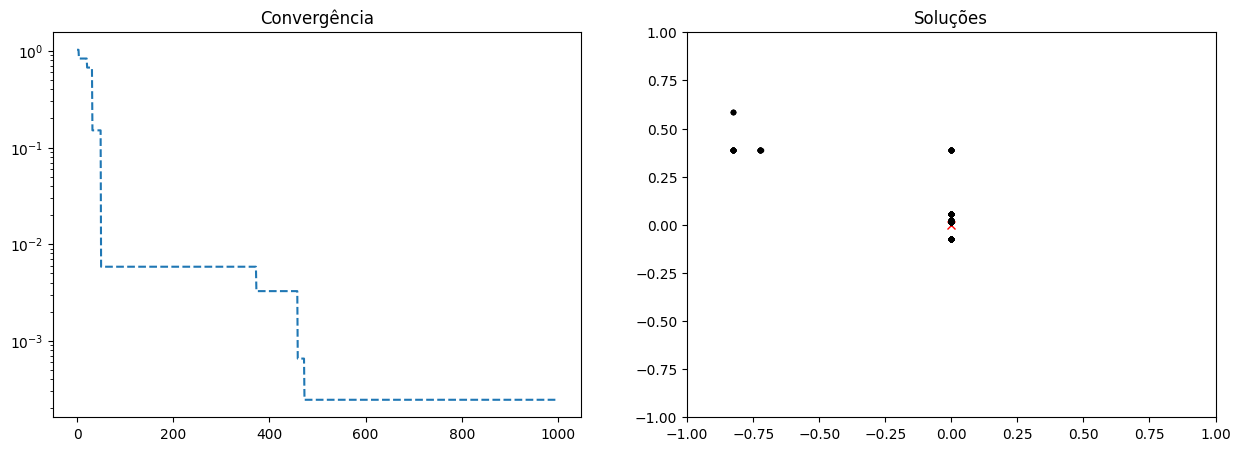

In [ ]:
#Convergência
opt = np.array([e.opt[0].F for e in res.history])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Convergência")
plt.plot(opt, "--")
plt.yscale("log")

sol = np.array([e.opt[0].X for e in res.history])

plt.subplot(1,2,2)
plt.title("Soluções")
plt.plot(0,0, "x", color="red")
plt.plot(sol[:,0],sol[:,1], ".", color="black")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

Abaixo nós executamos o AG com parâmetros padrão do algoritmo. A seleção é um torneio binário e a sobrevivência é feita pela aptidão. Contudo, o cruzamento usa o método SBX e a mutação uma estratégia polinomial. Mais sobre estas técnicas é visto à frente.

In [ ]:
algorithm = GA(pop_size=cromossomos,
               #seleção é feita em um torneio binario
               #cruzamento SBX
               #mutação Polinomial
               #sobrevivência é feita pela aptidão
               eliminate_duplicates=False)

res = minimize(problem,
               algorithm,
               ('n_gen', geracoes),
               save_history=True,
               seed=1)
print("Rodando com parâmetros padrão do método")
print("Melhor solução: \nX = %s\nF = %s" % (res.X, res.F))

Rodando com parâmetros padrão do método
Melhor solução: 
X = [-2.99656947e-04 -5.21593315e-05]
F = [9.25148818e-08]


A convergência do algoritmo é ilustrada novamente. Como se pode ver, com as mesmas 200 gerações pôde-se obter um resultado melhor.

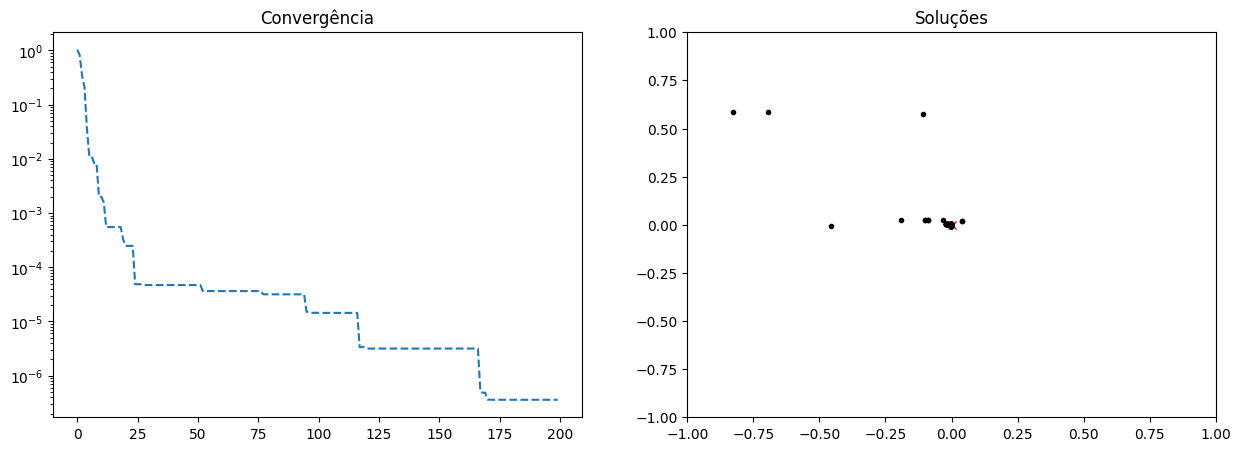

In [ ]:
#Convergência
opt = np.array([e.opt[0].F for e in res.history])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Convergência")
plt.plot(opt, "--")
plt.yscale("log")

sol = np.array([e.opt[0].X for e in res.history])

plt.subplot(1,2,2)
plt.title("Soluções")
plt.plot(0,0, "x", color="red")
plt.plot(sol[:,0],sol[:,1], ".", color="black")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

## SBX Crossover (Simulated Binary Crossover)


**Crossover for continuous variables** that operates **not on the entire chromosome, but on each gene individually**, i.e., for each continuous variable. This crossover method was designed to provide a **search power** similar to that achieved by one-point crossover in purely binary vectors.

The **search power** of a crossover operator refers to the probability of generating an arbitrary offspring point within the search space given two parents. A crossover operator is a stochastic process, meaning its output is random; however, a good operator should be capable of producing diverse offspring from the parents with some probability.

Given two parents ($p_1$ and $p_2$) and two offspring ($c_1$ and $c_2$), the **spread factor** measures how much the offspring differ from each other relative to the difference between their parents:

$$
\beta = \left|\frac{c_2 - c_1}{p_2 - p_1}\right|
$$

The interpretation of this value is illustrated below.


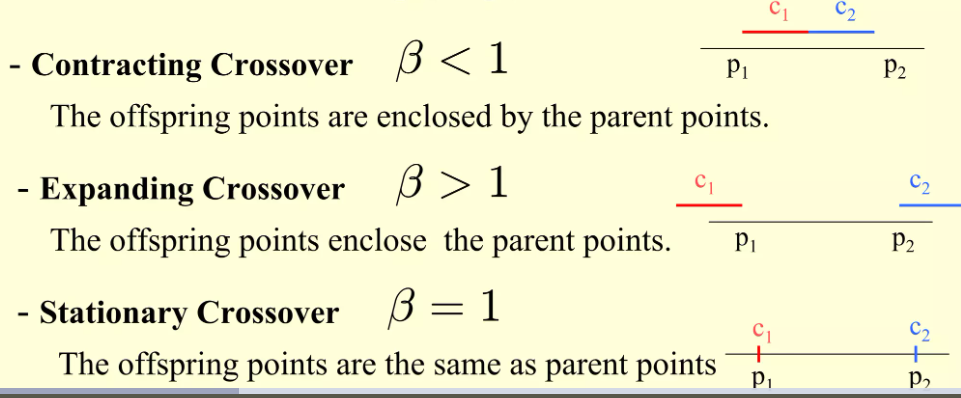

Note that, given the difference between the parents and a certain $\hat{\beta}$, one can estimate the difference between $c_1$ and $c_2$. If we assume that the offspring are centered around the **average of the parents** ($\bar{x}$) and are symmetrically spread by that difference, we can determine the values of $c_1$ and $c_2$ as follows:

$$
c_1 = \bar{x} - \frac{\hat{\beta}(p_2 - p_1)}{2} \\
c_2 = \bar{x} + \frac{\hat{\beta}(p_2 - p_1)}{2}
$$



**But how can we choose $\beta$?**

(DEB, K. & AGRAWAL, 1995) show that in a one-point binary crossover operation, the probability density function of $\beta$ is given by:

$$
f(\beta) = \begin{cases}
0.5(\eta_c+1)\beta^{\eta_c} & \text{if } \beta \leq 1 \\
0.5(\eta_c+1)\frac{1}{\beta^{\eta_c+2}} & \text{if } \beta > 1
\end{cases}
$$

This is represented graphically below.

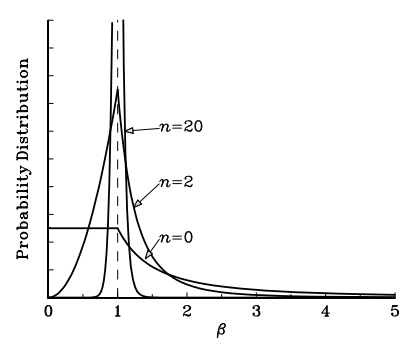

Therefore, for each crossover operation, we can obtain $\beta$ **randomly via simulation**. To do this, we generate $U \sim \text{Unif}(0,1)$ and calculate the value of $\beta$ using the inverse of the cumulative distribution function (as with any other random variable).

As explained by (DEB, K.; SINDHYA, K.; OKABE, T., 2007), an important feature of the SBX operator is that at the initial generations, when solutions are still influenced by random generation, <u>the differences between two parents randomly selected by tournament tend to be large, leading to offspring that are also far from their parents</u>, **which broadens the search space**. However, as generations progress and <u>solutions tend to converge (i.e., the difference between parents decreases), the offspring should also remain relatively close</u>, **focusing the search on a smaller region**.

The parameter $\eta_c$ is used to control the shape of the $\beta$ distribution. The higher the value of $\eta_c$, the more likely $\beta$ is to be close to 1. The experiment below illustrates this idea. Only two individuals with a single continuous variable, fixed at 0.2 and 0.8, are used as parents. These parents are repeated across a population of 1,000 pairs, and each pair is used to generate two offspring.

The experiment is repeated for two values of $\eta_c$: 2 and 10. As can be seen, increasing $\eta_c$ reduces the variability around the parents.


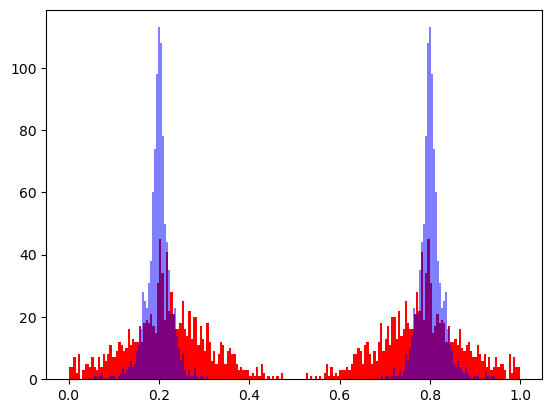

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.core.individual import Individual
from pymoo.core.problem import Problem
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.repair.rounding import RoundingRepair


def show(eta_cross, clr="red", al=1.0):
    problem = Problem(n_var=1, xl=0.0, xu=1.0)

    a, b = Individual(X=np.array([0.2])), Individual(X=np.array([0.8]))

    parents = [[a, b] for _ in range(1000)]

    off = SBX(prob=1.0, prob_var=1.0, eta=eta_cross).do(problem, parents)

    Xp = off.get("X")

    plt.hist(Xp, bins=200, color=clr, alpha=al)


show(2)
show(15,"blue",0.5)
plt.show()

## Polynomial Mutation


Polynomial mutation is a **random mutation** introduced by (DEB, K.; SINDHYA, K.; OKABE, T., 2007). It is based on the same strategy used in SBX. The general idea behind this operator is that the mutated variable should remain close to its original value—that is, the probability of small mutations is higher than that of large mutations.

Just like SBX, polynomial mutation is governed by a parameter $\eta$, whose impact is illustrated in the example below.


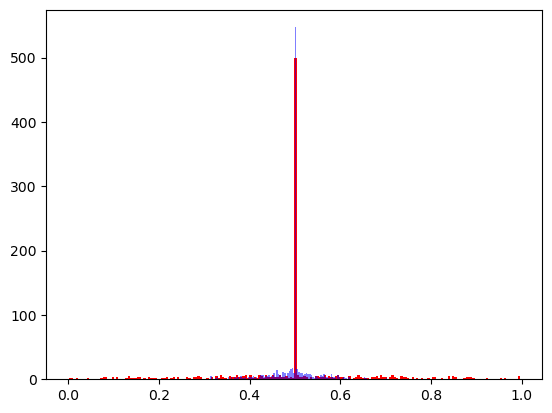

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.core.population import Population
from pymoo.core.problem import Problem
from pymoo.operators.mutation.pm import PolynomialMutation


def show(eta_mut, clr="red", al=1.0):
    problem = Problem(n_var=1, xl=0.0, xu=1.0)

    X = np.full((1000, 1), 0.5)
    pop = Population.new(X=X)

    mutation = PolynomialMutation(prob=1.0, eta=eta_mut)

    off = mutation(problem, pop)
    Xp = off.get("X")

    plt.hist(Xp, bins=200, color=clr, alpha=al)

show(2)
show(15,"blue",al=0.5)
plt.show()

## GA – Example 2 – Knapsack Problem


You're going to have lunch, and you know your personal preference for different foods (e.g., you like apples more than donuts), but you have a calorie limit (e.g., you don’t want to consume more than 800 kcal). Choosing what to eat is a **knapsack problem**. Assume a calorie limit of **1000 kcal**.

| Food     | Utility | Calories |
| -------- | ------- | -------- |
| Wine     | 89      | 123      |
| Beer     | 90      | 154      |
| Pizza    | 30      | 258      |
| Sandwich | 50      | 454      |
| Fries    | 90      | 565      |
| Coke     | 79      | 150      |
| Apple    | 90      | 95       |
| Donut    | 10      | 195      |


$u_j$ = utility of food item

$p_j$ = calorie count of food item

$C_{\text{max}}$ = calorie limit

$x_j$ = binary variable that is 1 if the food is selected, 0 otherwise

$$
\max \sum_j u_j x_j \\
\text{s.t.} \\
\sum_j p_j x_j \leq C_{\text{max}} \\
x_j \in \{0,1\}
$$


**Solution**

From previous lessons, we already know that the maximum utility obtained for this problem is **398.0**, and the selected items are: <u>Wine, Beer, Sandwich, Coke, Apple</u>.
The total calorie count of these items is **976.0**.


Below, we start by organizing our data in a dictionary and, from it, extract the utility and calorie lists, as well as the calorie limit `cmax`.


In [ ]:
# 1) Data setup
items    = ["Wine","Beer","Pizza","Sandwich","Fries","Coke","Apple","Donut"]
utils    = np.array([89,   90,   30,    50,      90,    79,    90,     10])
calories = np.array([123,  154,  258,   454,     565,   150,    95,    195])
capacity = 1000               # W


In [ ]:
# 2) Fitness function with penalty
def knapsack_fitness(genes):
    """
    genes: continuous vector ∈ ℝ^8
    x_i = 0 or 1 by rounding clipped genes
    Returns: negative utility + heavy penalty for overweight
    """
    # map genes to binary decision x_i
    x = np.round(np.clip(genes, 0, 1)).astype(int)
    total_cal = x.dot(calories)
    total_util = x.dot(utils)
    # quadratic penalty if overweight
    penalty = max(0, total_cal - capacity)
    return -total_util + 1000 * penalty**2


In [ ]:
# 3) GA parameters
population_size = 50
generations     = 100
mutation_rate   = 0.1
elite_count     = 2

min_values = [0]*len(items)   # genes lower bound
max_values = [1]*len(items)   # genes upper bound


In [ ]:
# 4) Run the GA
best = genetic_algorithm(
    population_size = population_size,
    mutation_rate   = mutation_rate,
    elite           = elite_count,
    min_values      = min_values,
    max_values      = max_values,
    eta             = 1,
    mu              = 1,
    generations     = generations,
    target_function = knapsack_fitness,
    verbose         = True
)


Generation =  0  f(x) =  -358.0
Generation =  1  f(x) =  -398.0
Generation =  2  f(x) =  -398.0
Generation =  3  f(x) =  -398.0
Generation =  4  f(x) =  -398.0
Generation =  5  f(x) =  -398.0
Generation =  6  f(x) =  -398.0
Generation =  7  f(x) =  -398.0
Generation =  8  f(x) =  -398.0
Generation =  9  f(x) =  -398.0
Generation =  10  f(x) =  -398.0
Generation =  11  f(x) =  -398.0
Generation =  12  f(x) =  -398.0
Generation =  13  f(x) =  -398.0
Generation =  14  f(x) =  -398.0
Generation =  15  f(x) =  -398.0
Generation =  16  f(x) =  -398.0
Generation =  17  f(x) =  -398.0
Generation =  18  f(x) =  -398.0
Generation =  19  f(x) =  -398.0
Generation =  20  f(x) =  -398.0
Generation =  21  f(x) =  -398.0
Generation =  22  f(x) =  -398.0
Generation =  23  f(x) =  -398.0
Generation =  24  f(x) =  -398.0
Generation =  25  f(x) =  -398.0
Generation =  26  f(x) =  -398.0
Generation =  27  f(x) =  -398.0
Generation =  28  f(x) =  -398.0
Generation =  29  f(x) =  -398.0
Generation =  30  f(

In [ ]:
# 5) Extract and display the best solution
genes_best = best[:-1]                          # first 8 entries are genes
x_best     = np.round(np.clip(genes_best,0,1)).astype(int)
util_best  = x_best.dot(utils)
cal_best   = x_best.dot(calories)

print("Selected items:")
for name, sel in zip(items, x_best):
    if sel:
        print(" •", name)
print(f"\nTotal utility = {util_best}, Total calories = {cal_best}")


Selected items:
 • Wine
 • Beer
 • Sandwich
 • Coke
 • Apple

Total utility = 398, Total calories = 976
